#**Dataset Cleanup**

##**Library Imports**##

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import datetime

In [ ]:
import matplotlib.pyplot as plt

##**Feed Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Orbital Insight Team Folder/shanghai_2019-06-01 00_00_00_2019-09-30 00_00_00.csv")

In [ ]:
df.head()

,Unnamed: 0,unixtime,geohash,device_id,imo,lat_deg,lon_deg,nav_status_code,vessel_name,eta,cog,sog,rot,heading,vessel_type_code,vessel_class,length,width,destination,draught
0,0,1559386188,wtqdmmjym,352634000,9431173,29.955313,121.879475,1,BASTIONS,5301900,0.3,296.7,-3.615863,200,79,A,245.0,43.0,CN BEI,11.2
1,1,1559383466,wtqddc2ze,413362190,0,29.978877,121.762662,16,QI SHUN 18,2460,7.8,258.4,0.000000,0,70,B,55.0,9.0,NaN,0.0
2,2,1559386095,wtqd6pgeb,413696390,0,29.970000,121.733333,5,XIN CHENG GONG 22,6011120,0.0,5.0,0.000000,0,70,A,140.0,20.0,NB,7.3
3,3,1559385015,wtnxpuxst,412361770,0,29.380967,121.991750,0,AN TAI 28,12101200,10.1,2.2,0.000000,2,70,A,53.0,10.0,NEW YORK,3.0
4,4,1559386318,wtqdp96u0,413410910,0,29.890385,121.974017,0,YONG HAI AN 6,7131320,0.0,92.9,0.000000,106,52,A,30.0,10.0,BAI FENG,4.2


In [ ]:
df.shape

(7350023, 20)

In [ ]:
df.columns

Index(['Unnamed: 0', 'unixtime', 'geohash', 'device_id', 'imo', 'lat_deg',
       'lon_deg', 'nav_status_code', 'vessel_name', 'eta', 'cog', 'sog', 'rot',
       'heading', 'vessel_type_code', 'vessel_class', 'length', 'width',
       'destination', 'draught'],
      dtype='object')

##**Clean Null Values**

In [ ]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

Unnamed: 0                0
unixtime                  0
geohash                   0
device_id                 0
imo                       0
lat_deg                   0
lon_deg                   0
nav_status_code           0
vessel_name              50
eta                       0
cog                       0
sog                       0
rot                       0
heading                   0
vessel_type_code          0
vessel_class              0
length                50542
width                 50541
destination         1955378
draught                   0
dtype: int64

In [ ]:
df.drop("imo", axis = 1, inplace = True)

In [ ]:
df.drop("vessel_name", axis = 1, inplace = True)

In [ ]:
df.drop(df.loc[df['nav_status_code'] == 16].index, inplace=True)

In [ ]:
df.drop(df.loc[df['length'] == 0].index, inplace=True)
df.drop(df.loc[df['width'] == 0].index, inplace=True)
df.drop(df.loc[df['draught'] == 0].index, inplace=True)

###**Correlation Matrix**

In [ ]:
#Helps remove features that are not needed

In [ ]:
#Could also add a histogram plot

In [ ]:
df.head()

,Unnamed: 0,unixtime,geohash,device_id,lat_deg,lon_deg,nav_status_code,eta,cog,sog,rot,heading,vessel_type_code,vessel_class,length,width,destination,draught
0,0,1559386188,wtqdmmjym,352634000,29.955313,121.879475,1,5301900,0.3,296.7,-3.615863,200,79,A,245.0,43.0,CN BEI,11.2
2,2,1559386095,wtqd6pgeb,413696390,29.970000,121.733333,5,6011120,0.0,5.0,0.000000,0,70,A,140.0,20.0,NB,7.3
3,3,1559385015,wtnxpuxst,412361770,29.380967,121.991750,0,12101200,10.1,2.2,0.000000,2,70,A,53.0,10.0,NEW YORK,3.0
4,4,1559386318,wtqdp96u0,413410910,29.890385,121.974017,0,7131320,0.0,92.9,0.000000,106,52,A,30.0,10.0,BAI FENG,4.2
5,5,1559386617,wtnxb5u6s,413210310,29.508333,121.646667,5,5281100,0.0,0.0,0.000000,0,70,A,72.0,14.0,XIANG SHAN,4.9


In [ ]:
df.shape

(4558643, 18)

##**Calculate Tonnage**

In [ ]:
df['tonnage'] = 0

In [ ]:
df['tonnage'] = df['length'] * df['width'] * df['draught']

In [ ]:
df = df[df['tonnage'].notna()]

In [ ]:
df.head()

,Unnamed: 0,unixtime,geohash,device_id,lat_deg,lon_deg,nav_status_code,eta,cog,sog,rot,heading,vessel_type_code,vessel_class,length,width,destination,draught,tonnage
0,0,1559386188,wtqdmmjym,352634000,29.955313,121.879475,1,5301900,0.3,296.7,-3.615863,200,79,A,245.0,43.0,CN BEI,11.2,117992.0
2,2,1559386095,wtqd6pgeb,413696390,29.970000,121.733333,5,6011120,0.0,5.0,0.000000,0,70,A,140.0,20.0,NB,7.3,20440.0
3,3,1559385015,wtnxpuxst,412361770,29.380967,121.991750,0,12101200,10.1,2.2,0.000000,2,70,A,53.0,10.0,NEW YORK,3.0,1590.0
4,4,1559386318,wtqdp96u0,413410910,29.890385,121.974017,0,7131320,0.0,92.9,0.000000,106,52,A,30.0,10.0,BAI FENG,4.2,1260.0
5,5,1559386617,wtnxb5u6s,413210310,29.508333,121.646667,5,5281100,0.0,0.0,0.000000,0,70,A,72.0,14.0,XIANG SHAN,4.9,4939.2


##**Convert Unixtime**

In [ ]:
df['unix_to_date'] = 0

In [ ]:
df['unix_to_date'] = pd.to_datetime(df['unixtime'], unit='s').apply(lambda x: x.to_datetime64())

In [ ]:
df.head()

,Unnamed: 0,unixtime,geohash,device_id,lat_deg,lon_deg,nav_status_code,eta,cog,sog,rot,heading,vessel_type_code,vessel_class,length,width,destination,draught,tonnage,unix_to_date
0,0,1559386188,wtqdmmjym,352634000,29.955313,121.879475,1,5301900,0.3,296.7,-3.615863,200,79,A,245.0,43.0,CN BEI,11.2,117992.0,2019-06-01 10:49:48
2,2,1559386095,wtqd6pgeb,413696390,29.970000,121.733333,5,6011120,0.0,5.0,0.000000,0,70,A,140.0,20.0,NB,7.3,20440.0,2019-06-01 10:48:15
3,3,1559385015,wtnxpuxst,412361770,29.380967,121.991750,0,12101200,10.1,2.2,0.000000,2,70,A,53.0,10.0,NEW YORK,3.0,1590.0,2019-06-01 10:30:15
4,4,1559386318,wtqdp96u0,413410910,29.890385,121.974017,0,7131320,0.0,92.9,0.000000,106,52,A,30.0,10.0,BAI FENG,4.2,1260.0,2019-06-01 10:51:58
5,5,1559386617,wtnxb5u6s,413210310,29.508333,121.646667,5,5281100,0.0,0.0,0.000000,0,70,A,72.0,14.0,XIANG SHAN,4.9,4939.2,2019-06-01 10:56:57


##**Obtain Dwell Time**

In [ ]:
df['dwell_time'] = 0

###**Dividing Pings Into Hours & Days**

In [ ]:
df['hour'] = -1

In [ ]:
df['day'] = -1

In [ ]:
def hourlyData(df):
    df['hour'] = (df['unixtime'] / 3600).astype(int)
    # re-index hours to 1
    df['hour'] = df['hour'] - df['hour'].min() + 1
    return df.groupby('hour')['device_id'].agg('nunique')

In [ ]:
def dailyData(df):
    df['day'] = (df['unixtime'] / 86400).astype(int)
    # re-index hours to 1
    df['day'] = df['day'] - df['day'].min() + 1
    return df.groupby('day')['device_id'].agg('nunique')

In [ ]:
df_anchored = df[(df['nav_status_code']==1)].copy()

In [ ]:
# tabulate unique ships by hour
hourly_anchored = hourlyData(df_anchored)
hourly_anchored

hour
1       332
2       342
3       346
4       355
5       368
       ... 
2900    382
2901    398
2902    391
2903    362
2904    348
Name: device_id, Length: 2904, dtype: int64

In [ ]:
hourly_anchored[11]

355

In [ ]:
df_anchored.head()

,Unnamed: 0,unixtime,geohash,device_id,lat_deg,lon_deg,nav_status_code,eta,cog,sog,...,vessel_class,length,width,destination,draught,tonnage,unix_to_date,dwell_time,hour,day
0,0,1559386188,wtqdmmjym,352634000,29.955313,121.879475,1,5301900,0.3,296.7,...,A,245.0,43.0,CN BEI,11.2,117992.0,2019-06-01 10:49:48,0,11,-1
34,34,1559386014,wtqdxcw33,412403020,29.979192,121.989842,1,5271500,0.3,40.4,...,A,180.0,28.0,ZHOU SHAN,5.7,28728.0,2019-06-01 10:46:54,0,11,-1
53,53,1559386730,wtqf84df1,413404390,29.984815,121.996017,1,6030900,0.0,39.2,...,A,117.0,16.0,DA LIAN,4.6,8611.2,2019-06-01 10:58:50,0,11,-1
63,63,1559385941,wtq8wzy4z,413821828,29.662220,121.945807,1,6010900,0.1,185.1,...,A,127.0,20.0,WU GANG,4.5,11430.0,2019-06-01 10:45:41,0,11,-1
64,64,1559386663,wtqf8h8pn,413364190,29.996627,121.992478,1,6011400,0.0,12.8,...,A,97.0,16.0,ZHOUSHAN,3.4,5276.8,2019-06-01 10:57:43,0,11,-1


In [ ]:
df_anchored['num_anchored_hour'] = df_anchored['hour'].apply(lambda x: hourly_anchored[x] if (x > 0) else 0)

In [ ]:
df_anchored.head()

,Unnamed: 0,unixtime,geohash,device_id,lat_deg,lon_deg,nav_status_code,eta,cog,sog,...,length,width,destination,draught,tonnage,unix_to_date,dwell_time,hour,day,num_anchored_hour
0,0,1559386188,wtqdmmjym,352634000,29.955313,121.879475,1,5301900,0.3,296.7,...,245.0,43.0,CN BEI,11.2,117992.0,2019-06-01 10:49:48,0,11,-1,355
34,34,1559386014,wtqdxcw33,412403020,29.979192,121.989842,1,5271500,0.3,40.4,...,180.0,28.0,ZHOU SHAN,5.7,28728.0,2019-06-01 10:46:54,0,11,-1,355
53,53,1559386730,wtqf84df1,413404390,29.984815,121.996017,1,6030900,0.0,39.2,...,117.0,16.0,DA LIAN,4.6,8611.2,2019-06-01 10:58:50,0,11,-1,355
63,63,1559385941,wtq8wzy4z,413821828,29.662220,121.945807,1,6010900,0.1,185.1,...,127.0,20.0,WU GANG,4.5,11430.0,2019-06-01 10:45:41,0,11,-1,355
64,64,1559386663,wtqf8h8pn,413364190,29.996627,121.992478,1,6011400,0.0,12.8,...,97.0,16.0,ZHOUSHAN,3.4,5276.8,2019-06-01 10:57:43,0,11,-1,355


In [ ]:
#tabulate unique ships by hour
daily_anchored = dailyData(df_anchored)
daily_anchored

day
1       751
2       840
3       897
4       907
5       934
       ... 
117    1020
118     870
119     803
120     774
121     816
Name: device_id, Length: 121, dtype: int64

In [ ]:
df_anchored['num_anchored_day'] = df_anchored['day'].apply(lambda x: daily_anchored[x] if (x > 0) else 0)

In [ ]:
df_anchored.head()

,Unnamed: 0,unixtime,geohash,device_id,lat_deg,lon_deg,nav_status_code,eta,cog,sog,...,width,destination,draught,tonnage,unix_to_date,dwell_time,hour,day,num_anchored_hour,num_anchored_day
0,0,1559386188,wtqdmmjym,352634000,29.955313,121.879475,1,5301900,0.3,296.7,...,43.0,CN BEI,11.2,117992.0,2019-06-01 10:49:48,0,11,1,355,751
34,34,1559386014,wtqdxcw33,412403020,29.979192,121.989842,1,5271500,0.3,40.4,...,28.0,ZHOU SHAN,5.7,28728.0,2019-06-01 10:46:54,0,11,1,355,751
53,53,1559386730,wtqf84df1,413404390,29.984815,121.996017,1,6030900,0.0,39.2,...,16.0,DA LIAN,4.6,8611.2,2019-06-01 10:58:50,0,11,1,355,751
63,63,1559385941,wtq8wzy4z,413821828,29.662220,121.945807,1,6010900,0.1,185.1,...,20.0,WU GANG,4.5,11430.0,2019-06-01 10:45:41,0,11,1,355,751
64,64,1559386663,wtqf8h8pn,413364190,29.996627,121.992478,1,6011400,0.0,12.8,...,16.0,ZHOUSHAN,3.4,5276.8,2019-06-01 10:57:43,0,11,1,355,751


####**Plotting Hours & Days**

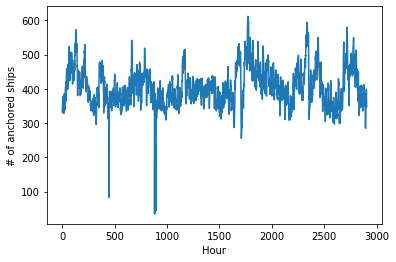

In [ ]:
plt.plot(hourly_anchored)
plt.xlabel('Hour')
plt.ylabel('# of anchored ships')
plt.show()

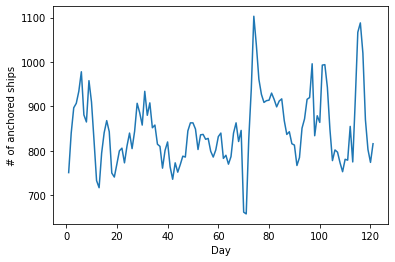

In [ ]:
plt.plot(daily_anchored)
plt.xlabel('Day')
plt.ylabel('# of anchored ships')
plt.show()

###**Dwell Time Calculations**

In [ ]:
sorted_anchored = df_anchored.sort_values('hour')
sorted_anchored

,Unnamed: 0,unixtime,geohash,device_id,lat_deg,lon_deg,nav_status_code,eta,cog,sog,...,width,destination,draught,tonnage,unix_to_date,dwell_time,hour,day,num_anchored_hour,num_anchored_day
22209,22209,1559350413,wtrjmhuyz,636091739,30.481373,122.570307,1,6012359,0.0,75.0,...,40.0,YANGSHAN,12.5,137500.0,2019-06-01 00:53:33,0,1,1,332,751
22108,22108,1559350486,wtrkcxn1n,538004202,30.404865,122.769743,1,6020800,0.1,232.3,...,42.0,CN YAN,9.9,125571.6,2019-06-01 00:54:46,0,1,1,332,751
22107,22107,1559350401,wtrnbn3sw,413699520,30.752883,122.346090,1,5311030,0.1,334.1,...,19.0,SHANG HAI,5.2,13239.2,2019-06-01 00:53:21,0,1,1,332,751
22105,22105,1559350134,wtrm1m5kn,477319200,30.438333,122.755000,1,5301800,0.0,36.0,...,46.0,MJS CN,18.2,246974.0,2019-06-01 00:48:54,0,1,1,332,751
22104,22104,1559350648,wtrr9f332,416020000,30.862225,122.773960,1,5310330,0.0,47.0,...,27.0,CNSHA,7.0,31752.0,2019-06-01 00:57:28,0,1,1,332,751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7348770,7349102,1569801529,wtr1n712d,353074000,29.723633,122.620237,1,9292000,0.1,80.6,...,32.0,CN ZOS,13.2,84057.6,2019-09-29 23:58:49,0,2904,121,348,816
7348762,7349094,1569801456,wtr16scp2,431800000,29.778333,122.455000,1,9280300,0.0,336.0,...,50.0,CN ZOS,8.3,124500.0,2019-09-29 23:57:36,0,2904,121,348,816
7348761,7349093,1569799894,wtqfk4jyf,413458790,29.938922,122.175983,1,10021000,0.0,81.5,...,19.0,ZA PU,6.0,15048.0,2019-09-29 23:31:34,0,2904,121,348,816
7348871,7349203,1569800919,wtr19beuc,538005574,29.798500,122.425883,1,9250500,0.1,316.0,...,48.0,ZHOUSHAN,8.1,106531.2,2019-09-29 23:48:39,0,2904,121,348,816


In [ ]:
sorted_arr = sorted_anchored['device_id'].unique() #unique device id
dwell_times = {}
trip_start = {}

In [ ]:
for i in sorted_arr:
  # All anchored time for each unique ships
  current_time = sorted_anchored.loc[sorted_anchored['device_id'] == i][['hour']]
  array_hour = current_time.values.tolist()
  hour_len = len(array_hour)
  biggest_dif = 0
  # it contains index of list_hour(list unique ship's "hour" column) that seems to start new trips
  trip_change = [0]
  list_hours = []

  for x in array_hour:
    list_hours.append(x[0])

  for j in list_hours:
    next_index = list_hours.index(j) + 1
    if(next_index < hour_len):
      biggest_dif = list_hours[next_index] - j
    # This means this ships had done multiple trips
    if(biggest_dif > 12):
      trip_change.append(next_index)

  dwell = []
  start_times = []

  for h in range(len(trip_change)):
    # This "if" condition for avoiding index range error
    if((len(array_hour) != trip_change[h])):
      ## the case when there are only two different "trip changes"
      if(len(trip_change) == 2 and h == 1):
        dwell.append((list_hours[trip_change[h]-1] - list_hours[trip_change[h-1]]) + 1) #trip 1
        start_times.append(list_hours[trip_change[h-1]])

        dwell.append(list_hours[-1] - list_hours[trip_change[h]] + 1) #trip 2
        start_times.append(list_hours[trip_change[h]])

      #Last index
      elif(h + 1 == len(trip_change)):
        dwell.append(list_hours[-1] - list_hours[trip_change[h]] + 1)
        start_times.append(list_hours[trip_change[h]])
        
      # Other index
      elif (h != 0):
        dwell.append((list_hours[trip_change[h]-1] - list_hours[trip_change[h-1]]) + 1)
        start_times.append(list_hours[trip_change[h-1]])
  
  dwell_times[i] = dwell
  trip_start[i] = start_times

In [ ]:
print(dwell_times)
print(trip_start)

{636091739: [13], 538004202: [27, 4], 413699520: [13, 16, 4, 5], 477319200: [40, 72, 74, 34, 7], 416020000: [6, 25, 22, 176, 11, 22, 11, 50, 17, 26, 10, 13, 19, 26], 355282000: [21], 372382000: [120], 413420140: [21, 16, 4, 35, 5, 3, 8, 25, 5, 8, 16, 9, 6, 22, 2, 14], 413359870: [2, 25, 25, 23, 15, 22, 6, 5, 5, 11, 2, 3, 1, 25, 43, 92, 19, 40, 15, 30], 413527980: [96, 14], 414400710: [273, 28, 634, 610, 560, 395, 166], 412379740: [2285, 504], 667001991: [12, 11, 9, 2, 276, 9, 11, 35, 35, 10, 242, 13, 16, 220, 10, 450, 312, 1], 413437170: [14, 9, 19, 6, 1, 3, 5, 7, 6, 4, 10, 18, 4, 25, 18, 2, 3, 2, 3, 13, 2, 8, 4, 20, 10, 2, 5, 8], 564169000: [5, 21], 477628300: [2, 4, 45], 563079900: [23, 9, 7, 13], 636018735: [2777], 413907000: [20, 1, 29, 19, 29, 20, 8], 412412380: [24, 11, 36, 7, 36, 81, 188, 2, 3], 413378360: [6, 2, 11, 6, 11, 10, 1, 37, 85, 47, 24, 102, 4, 17, 66, 32, 76, 8, 26, 47, 4, 9, 51, 2], 413139000: [98, 1, 18], 412373140: [26, 82, 24, 50, 6, 27, 25, 2, 2, 43, 46, 14, 9, 6

In [ ]:
new_sorted_anchored = sorted_anchored.copy()
# key == vessel's device id
dwell_times_keys = dwell_times.keys()
for i in dwell_times_keys:
  # Get all trips of one unique vessels
  target = sorted_anchored.loc[sorted_anchored['device_id'] == i]
  # Get the 'hour' data of that unique vessel
  target_hours = target['hour']
  hours_array = np.array(target_hours)
  for j in hours_array:
    # basically in our AIS data, 
    if that hour is in "trip_start" column of that vessel, add "dwell time" column,
    # s
    if (j in trip_start[i]):
      # get the row index of that target data
      row_num = (target[target['hour'] == j].index)[0]
      # get the dwell time index of that target data
      dwell_idx = trip_start[i].index(j)
      #df.loc[rowIndex, 'New Column Title'] = "some value"
      new_sorted_anchored.loc[row_num, 'dwell_time'] = dwell_times[i][dwell_idx]

KeyboardInterrupt: ignored

In [ ]:
final_sorted_anchored = new_sorted_anchored[new_sorted_anchored['dwell_time'] > 0]

In [ ]:
final_sorted_anchored.head()

##**Demarcate Typhoon Hours**

In [ ]:
final_sorted_anchored['typhoon'] = 0

In [ ]:
final_sorted_anchored['typhoon'] = final_sorted_anchored['unixtime'].apply(lambda x: 1 if (x <= 1565459100 and x >= 1565372700) else 0)

In [ ]:
final_sorted_anchored.head()

In [ ]:
final_sorted_anchored.loc[final_sorted_anchored['typhoon'] == 1]

##**Export Cleaned Dataset**

In [ ]:
final_sorted_anchored.to_csv("clean_shanghai 2019-06-01 00_00_00_2019-09-30 00_00_00.csv")